# 7. Sampling and Reconstruction of Signals: Analysis of Aliasing Effects and Proper Signal Reconstruction

## Example 1: Demonstration of Aliasing

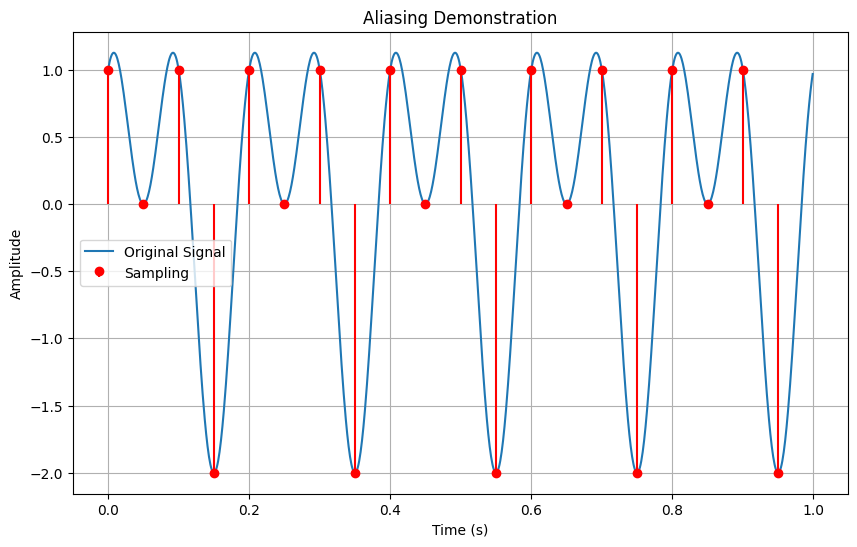

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# Original signal parameters
f_signal = 5  # Frequency of the signal (Hz)
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector

# Mixed siganl
f1 = 5  # Frequency of sine wave
f2 = 10  # Frequency of cosine wave
mixed_signal = np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

signal = np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Sampling parameters
f_sample_low = 20  # Low sampling frequency (Hz)

# Sampling the signal
t_low = np.arange(0, 1, 1 / f_sample_low)
samples = np.interp(t_low, t, mixed_signal)  # Sampled signal

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, mixed_signal, label='Original Signal')
plt.stem(t_low, samples, linefmt='r-', markerfmt='ro', basefmt=" ", label='Sampling')
plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Example 2: Signal Reconstruction

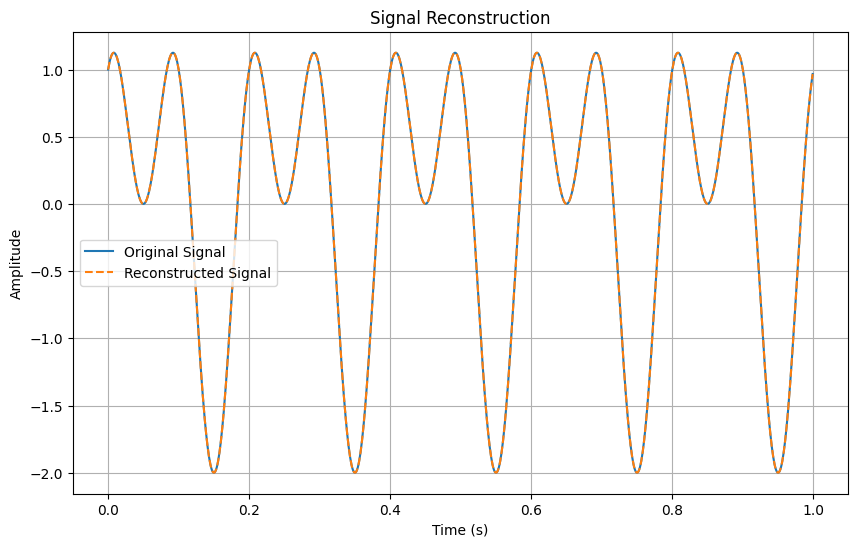

In [33]:
from scipy.signal import resample

# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Coding and Decoding Digital Signals

## Trade-off Analysis Between Compression Ratio and Signal Distortion

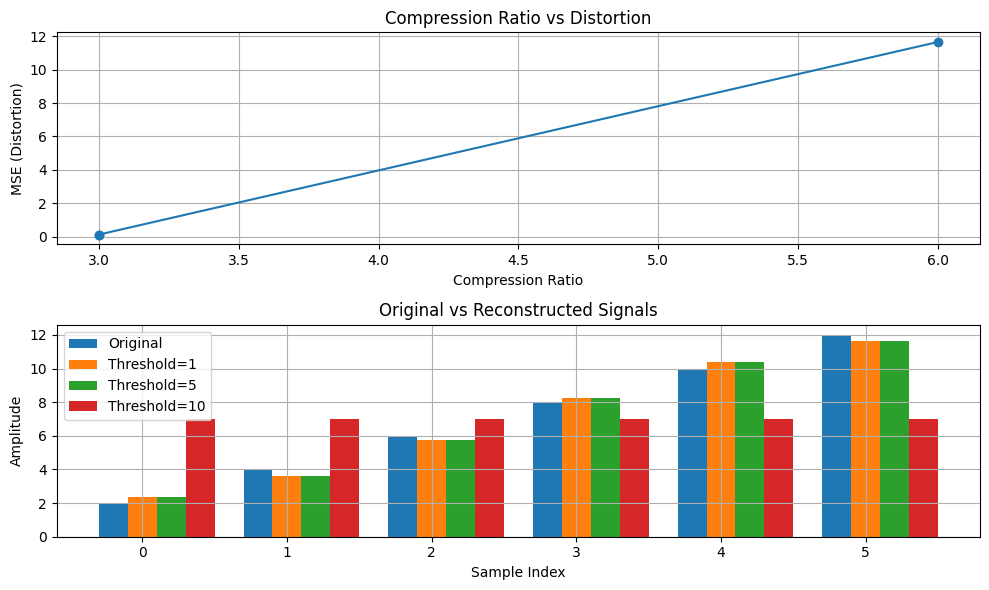

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# Define the signal from Problem 4
signal = np.array([2, 4, 6, 8, 10, 12])

# Set thresholds as specified
thresholds = [1, 5, 10]

# Function to analyze compression and distortion
def analyze_dct_compression(signal, threshold):
    # Original signal size
    original_size = len(signal)
    
    # Apply DCT
    dct_coeffs = dct(signal, norm='ortho')
    
    # Apply thresholding (values below threshold set to zero)
    compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)
    
    # Calculate compression ratio
    nonzero_count = np.count_nonzero(compressed_coeffs)
    if nonzero_count == 0:  # Avoid division by zero
        compression_ratio = float('inf')
    else:
        compression_ratio = original_size / nonzero_count
    
    # Reconstruct signal using IDCT
    reconstructed_signal = idct(compressed_coeffs, norm='ortho')
    
    # Calculate distortion (MSE)
    mse = np.mean((signal - reconstructed_signal) ** 2)
    
    return {
        'original': signal,
        'dct_coeffs': dct_coeffs,
        'compressed_coeffs': compressed_coeffs,
        'reconstructed': reconstructed_signal,
        'compression_ratio': compression_ratio,
        'mse': mse,
        'nonzero_count': nonzero_count
    }

# Analyze each threshold
results = []
for threshold in thresholds:
    result = analyze_dct_compression(signal, threshold)
    results.append(result)
    
# Plot compression ratio vs distortion
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot([r['compression_ratio'] for r in results], [r['mse'] for r in results], 'o-')
plt.xlabel('Compression Ratio')
plt.ylabel('MSE (Distortion)')
plt.title('Compression Ratio vs Distortion')
plt.grid(True)

# Plot original vs reconstructed for each threshold
plt.subplot(2, 1, 2)
x = np.arange(len(signal))
width = 0.2
plt.bar(x - width, signal, width, label='Original')
for i, r in enumerate(results):
    plt.bar(x + i*width, r['reconstructed'], width, label=f'Threshold={thresholds[i]}')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()